In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from PIL import Image
import matplotlib.pyplot as plt

In [56]:
# from google.colab import drive
# drive.mount("/content/drive/")

path = 'drive/My Drive/Artificial intelligence/lab3/'

In [57]:
class MnistNet(nn.Module):
    """
    Liteweight network architecture for the Mnist dataset (digit) classification
    """
    def __init__(self):
        super(MnistNet, self).__init__()
        self.num_classes = 10
        
        # fully convolutional part
        self.features = nn.Sequential(
            nn.Conv2d(1, 4, kernel_size=5),
            nn.BatchNorm2d(4),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(4, 4, kernel_size=5),
            nn.Dropout(p=0.2),
            nn.BatchNorm2d(4),
            nn.MaxPool2d(kernel_size=2),
            nn.ReLU(inplace=True)  
        )
        
        # classifier, FC layers
        self.classifier = nn.Sequential(
            nn.Linear(16*4,16),
            nn.ReLU(inplace=True),
            nn.Linear(16,self.num_classes)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x.view(-1,x.size(-3)*x.size(-2)*x.size(-1)))
        return x


def train(model, train_loader, optimizer):
    """
    Training of an epoch
    model: network
    train_loader: train_loader loading images and labels in batches
    optimizer: optimizer to use in the training
    """
    model.train()
    total_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # zero the accumulated gradients
        output = model(data) # computer network's output
        loss = F.cross_entropy(output, target) # computer the loss
        loss.backward() # backward pass
        optimizer.step() # update weights
        
        total_loss = total_loss + loss.item()
        
        if batch_idx % 100 == 0:
            print('[{}/{} ({:.0f}%)]\tBatch loss: {:.6f}'.format(
                batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()/len(data)))
    
    print('Training: Epoch average loss {:.6f}'.format(total_loss/len(train_loader.dataset)))
         
        
def test(model, val_loader):
    """
    Compute accuracy on the validation set
    model: network
    val_loader: test_loader loading images and labels in batches
    """
    model.eval()
    
    # implement validation procedure, report accuracy on the validation set
    
    ### YOUR CODE HERE
    test_losses = []
    test_loss = 0
    correct = 0
    with torch.no_grad():
      for data, target in val_loader:
        output = model(data)
        test_loss += F.cross_entropy(output, target).item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(val_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(correct, len(val_loader.dataset), 100. * correct / len(val_loader.dataset)))


Sample images


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


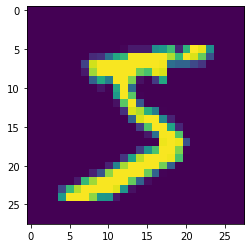

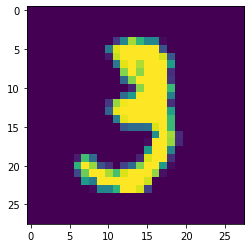

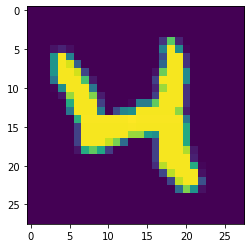

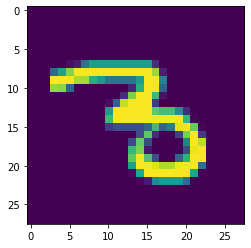

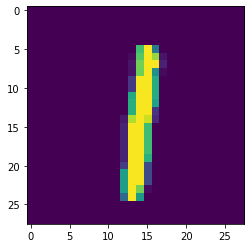

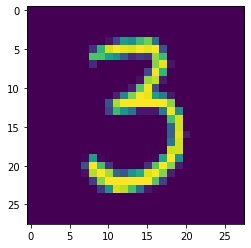

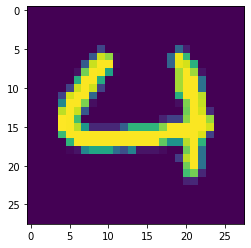

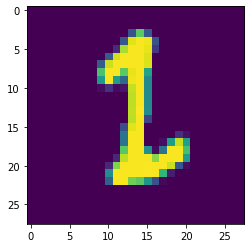

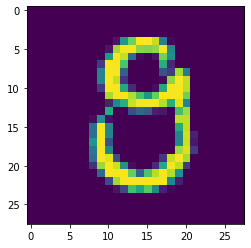

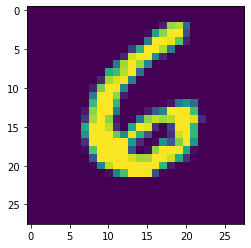

In [58]:
# mnist dataset structure - train part
mnist_dataset_train = datasets.MNIST(path + 'drive/My Drive/Artificial intelligence/lab3/vs3ex1data/mnist_data', train=True, download=True, transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
               ]))
# mnist dataset structure - test part
mnist_dataset_val = datasets.MNIST('drive/My Drive/Artificial intelligence/lab3/vs3ex1data/mnist_data', train=False, download=True, transform=transforms.Compose([
                   transforms.ToTensor(),
                   transforms.Normalize((0.1307,), (0.3081,))
               ]))
mnist_dataset_val
# show sample images
print('Sample images')
for i in range(0,100,10):
    plt.imshow(Image.fromarray(mnist_dataset_train.train_data[i].numpy(), mode='L'))
    plt.show()

In [54]:


# loader of the training set
train_loader = torch.utils.data.DataLoader(mnist_dataset_train,batch_size=16, shuffle=True)
# loader of the validation set
val_loader = torch.utils.data.DataLoader(mnist_dataset_val,batch_size=512, shuffle=False)

model = MnistNet() # initialize network structure

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 20 + 1):
        print('Epoch {}'.format(epoch))
        train(model, train_loader, optimizer)
        test(model, val_loader)


Epoch 1
[0/60000 (0%)]	Batch loss: 0.143973
[1600/60000 (3%)]	Batch loss: 0.028627
[3200/60000 (5%)]	Batch loss: 0.038451
[4800/60000 (8%)]	Batch loss: 0.006164
[6400/60000 (11%)]	Batch loss: 0.022183
[8000/60000 (13%)]	Batch loss: 0.011672
[9600/60000 (16%)]	Batch loss: 0.006615
[11200/60000 (19%)]	Batch loss: 0.022246
[12800/60000 (21%)]	Batch loss: 0.006361
[14400/60000 (24%)]	Batch loss: 0.016562
[16000/60000 (27%)]	Batch loss: 0.010264
[17600/60000 (29%)]	Batch loss: 0.003906
[19200/60000 (32%)]	Batch loss: 0.039113
[20800/60000 (35%)]	Batch loss: 0.005518
[22400/60000 (37%)]	Batch loss: 0.009126
[24000/60000 (40%)]	Batch loss: 0.006637
[25600/60000 (43%)]	Batch loss: 0.009196
[27200/60000 (45%)]	Batch loss: 0.002018
[28800/60000 (48%)]	Batch loss: 0.012220
[30400/60000 (51%)]	Batch loss: 0.008297
[32000/60000 (53%)]	Batch loss: 0.010993
[33600/60000 (56%)]	Batch loss: 0.006347
[35200/60000 (59%)]	Batch loss: 0.006980
[36800/60000 (61%)]	Batch loss: 0.007880
[38400/60000 (64%)]	Ba

By adding Batch Normalizations and one dropout layer after convolutions I increase the Accuracy on 2-3% in average (from 95% to 98%)
